In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt25 = "Make an rdf analysis of both oxygenated and deoxygenated hemoglobin structures"
llm_var = "gpt-4-1106-preview"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-07-25
time: 11:45:56
LLM:  gpt-4-1106-preview 
Temperature:  0.1


: 

In [3]:
agent.run(prompt25)

Thought: To perform an RDF (radial distribution function) analysis of both oxygenated and deoxygenated hemoglobin structures, I will need the PDB IDs of these structures. Once I have the PDB IDs, I can download the corresponding files and then use the RDFTool to calculate the RDF. First, I need to find the PDB IDs for oxygenated and deoxygenated hemoglobin.

Action:
```
{
  "action": "LiteratureSearch",
  "action_input": {
    "query": "PDB ID for oxygenated and deoxygenated hemoglobin"
  }
}
```

"hemoglobin oxygenated deoxygenated PDB ID"
Search: "hemoglobin oxygenated deoxygenated PDB ID"


Hit a service limit per status 429 with message {"message": "Too Many Requests. Please wait and try again or apply for a key for higher rate limits. https://www.semanticscholar.org/product/api#api-key-form", "code": "429"}, sleeping 0.19-sec before retry 1.
	Scraper openaccess failed on paper titled 'A DFT study on the relative affinity for oxygen of the α and β subunits of hemoglobin'.
Traceback (most recent call last):
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/scraper.py", line 82, in scrape
    result = await scraper.function(paper, path, **scraper.kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/lib.py", line 300, in openaccess_scraper
    await link_to_pdf(url, path, session)
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/lib.py", line 133, in link_to_pdf
    r.rais


Found 5 papers
The LiteratureSearch tool provided the necessary PDB IDs for oxygenated and deoxygenated hemoglobin. With these PDB IDs, I can now proceed to download the corresponding files using the PDBFileDownloader tool. After downloading the files, I will be able to perform the RDF analysis using the RDFTool.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "oxygenated hemoglobin"
  }
}
```PDB file found with this ID: 1HBI


2024-07-25 11:46:44.737 
  command:

    streamlit run /Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


I have successfully downloaded the PDB file for oxygenated hemoglobin. Now, I need to download the PDB file for deoxygenated hemoglobin using the PDBFileDownloader tool. Once I have both PDB files, I can proceed with the RDF analysis using the RDFTool.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "deoxygenated hemoglobin"
  }
}
```PDB file found with this ID: 3LHB
Now that I have the PDB files for both oxygenated and deoxygenated hemoglobin, I can proceed with the RDF analysis. I will use the RDFTool to calculate the radial distribution function for each structure. Since the RDF analysis is typically performed on a trajectory file, I will need to check if I have the trajectory files for these PDB IDs or if I need to simulate them.

Action:
```
{
  "action": "ListRegistryPaths",
  "action_input": {
    "paths": "paths"
  }
}
```
I have confirmed that I have the PDB files for both oxygenated and deoxygenated hemoglobin. However, I do not have trajector

In [ ]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

In [2]:
agent = MDAgent(agent_type="Structured", ckpt_dir="ckpt_279")
registry = agent.path_registry
print(registry.list_path_names_and_descriptions().replace(",","\n"))

Files found in registry: 1HBI_114645: PDB file downloaded from RSCB
 PDBFile ID: 1HBI_114645
 3LHB_114649: PDB file downloaded from RSCB
 PDBFile ID: 3LHB_114649
 1HBI_114735: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_114746: Initial positions for simulation sim0_114746
 sim0_114746: Basic Simulation of Protein 1HBI_114735
 rec0_114749: Simulation trajectory for protein 1HBI_114735 and simulation sim0_114746
 rec1_114749: Simulation state log for protein 1HBI_114735 and simulation sim0_114746
 rec2_114749: Simulation pdb frames for protein 1HBI_114735 and simulation sim0_114746
 3LHB_115441: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_115458: Initial positions for simulation sim0_115458
 sim0_115458: Basic Simulation o

In [3]:
path_oxygenated = registry.get_mapped_path("fig0_121707")
#path_deoxygenated = registry.get_mapped_path("fig0_144351")
assert os.path.exists(path_oxygenated), 'Path not found'
#assert os.path.exists(path_deoxygenated), 'Path not found'
#assert path_oxygenated != path_deoxygenated, 'Paths are the same'

AssertionError: Path not found

## Bug saving the paths from the rdf function. Below the plots are shown, but the experiments counts as incorrect answer


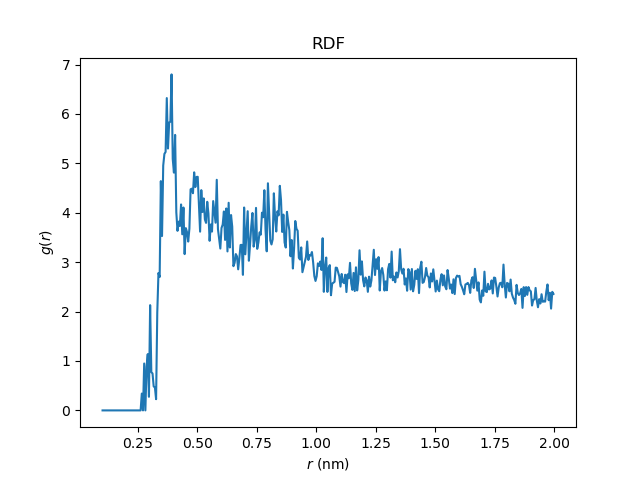

In [13]:
from IPython.display import Image
Image(filename=path_oxygenated)

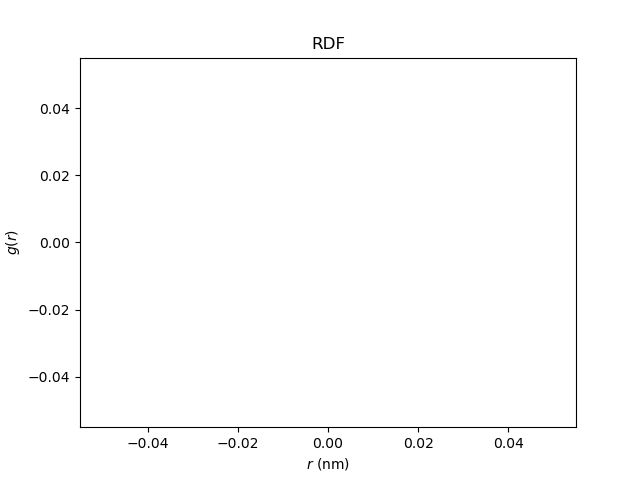

In [14]:
Image(filename=path_deoxygenated)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### Logic make sense ✅
### Correct Answer  ❌